<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 01 - Data visualization with Python @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Data Visualization 📌
</div>

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [175]:
df = pd.read_csv('../data/processed/used_cars_data_processed.csv')
df['Year'] = df['Year'].astype('string')
df['Seats'] = df['Seats'].astype('string')

In [176]:
df = df[df['Seats'] != "0.0"]


In [177]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.50,1598.0,103.60,5.0,3.65,Volkswagen
7247,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.20,1197.0,103.60,5.0,6.51,Volkswagen
7248,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.00,1461.0,63.10,5.0,3.50,Nissan
7249,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.00,1197.0,103.60,5.0,6.51,Volkswagen


# Khám phá mối quan hệ trong dữ liệu

## 1. Khám phá về dữ liệu đơn biến

### 1.1 Categorical: 
#### a) Cột "Company name"

Do cột "Company name" có kiểu dữ liệu là Categorical và số lượng loại giá trị không quá nhiều thích hợp sử dụng biểu đồ countplot (một dạng của biểu đồ bar) để khám phá về số lượng xe được bán lại của mỗi công ty. Một số ý nghĩa dành cho người phân tích là:
- Là người mua: có thể xem xét lựa chọn nên mua lại những loại xe cũ nào. VD: Nếu công ty xe đó có nhiều xe bán lại thì giá có thể rẻ, tuy nhiên vì chất lượng chưa được tốt nên bị bán lại hoặc có thể là lý do khác. Tùy theo phân tích người dùng có thể đưa ra quyết địn tốt hơn.
- Là người bán: nếu muốn bán xe nên xem xét để đưa ra mức giá bán hợp lý, nếu xe mình thuộc công ty bị bán nhiều thì có thể phải đưa ra mức giá hợp lý để có thể bán được.
- Là người sản xuất: tìm hiểu nguyên do vì sao xe công ty mình lại bị bán nhiều, có những nguyên do nào để đưa ra chiến lược phát triển tốt hơn.

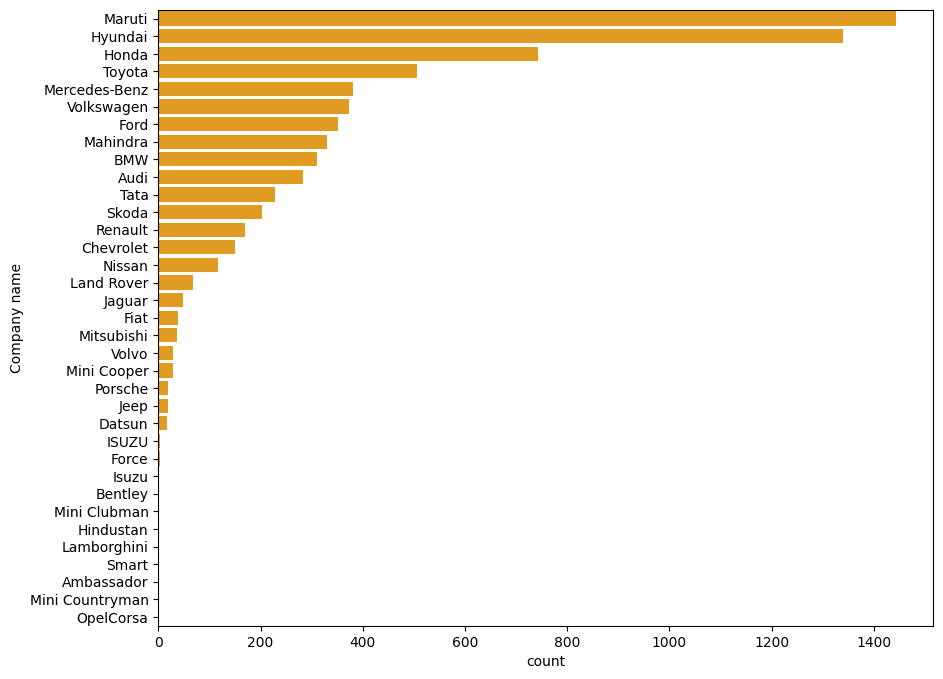

In [178]:
# Đếm số lượng mỗi giá trị trong cột 'Company name' và sắp xếp
company_counts = df['Company name'].value_counts().sort_values(ascending=False)

# Vẽ countplot với dữ liệu đã sắp xếp
plt.figure(figsize=(10, 8))  # Điều chỉnh kích thước figure
sns.countplot(df['Company name'], order=company_counts.index, color = 'orange')
plt.show()

Một số ý nghĩa từ biểu đồ là:
- Những công ty xe như Maruti, Hyundai có số lượng xe được bán lại rất nhiều.
- Một số dòng xe trong dữ liệu chỉ xuất hiện 1 hoặc 2 lần nên không thể thấy được cột.
- Có dữ liệu bị sai sót là có 2 công ty cùng có tên Isuzu

In [179]:
df['Company name'] = df['Company name'].replace('ISUZU', 'Isuzu')

#### b) Categorical: Cột "Company name"

Do cột "Fuel_Type" có kiểu dữ liệu là Categorical và số lượng loại giá trị chỉ có 4 sử dụng pie chart để khám phá về sự phân bố (theo phần trăm) của các loại nhiên liệu trong tập dữ liệu. Một số ý nghĩa dành cho người phân tích là:
- Là người mua: tìm hiểu thị trường bán lại có những loại nhiên liệu nào, ra quyết định nên mua loại nhiên liệu nào,..
- Là nhà sản xuất: tìm hiểu phát triển một số nhiên liệu mới như điện hoặc khí tự nhiên.

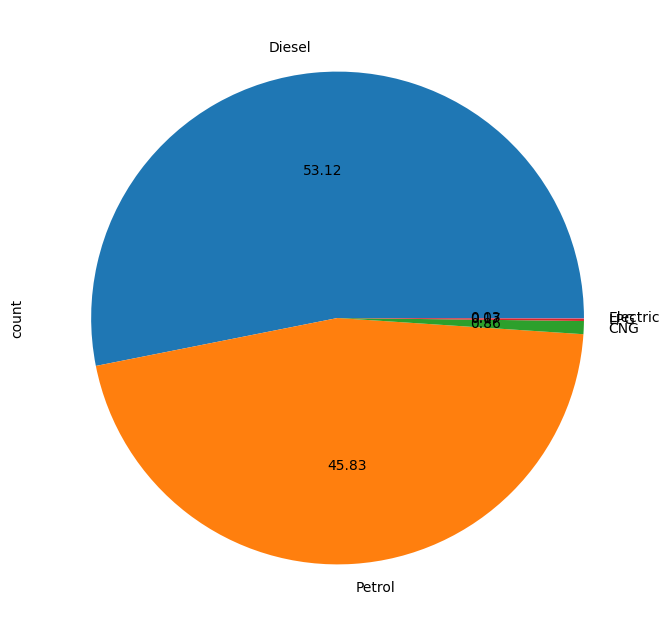

In [180]:
plt.figure(figsize=(10, 8))  
df['Fuel_Type'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Những ý rút ra được biểu đồ trên:
- Dữ liệu về các loại nhiên liệu như Electric, CNG và LPG có cực kỳ ít.
- Dữ liệu còn lại chủ yếu là dầu Diesel và xăng Petrol.

### 1.2 Numerical:
#### Cột "Mileage"

Đối với những cột có kiểu dữ liệu numerical có thể dùng violin plot để hiểu được sự phân bố của các giá trị như thế nào. Đây là một trong các biểu đồ tốt để khám phá về phân phối của dữ liệu dạng numerical. 
Biểu đồ bên dưới có một số ý nghĩa sau:
- Đối với người mua: tìm hiểu xem có những mức tiết kiệm nhiên liệu nào, giúp người mua có thể suy xét đưa ra quyết định tốt hơn.
- Đối với người bán: nếu xe đang muốn bán thuộc loại tiết kiệm nhiên liệu tốt hoặc thuộc số ít được bán thì có thể bán giá cao hơn và ngược lại.
- Đối với nhà sản xuất: nghiên cứu cải thiện độ tiết kiệm nhiên có thể nâng tầm thương hiệu và số người mua.

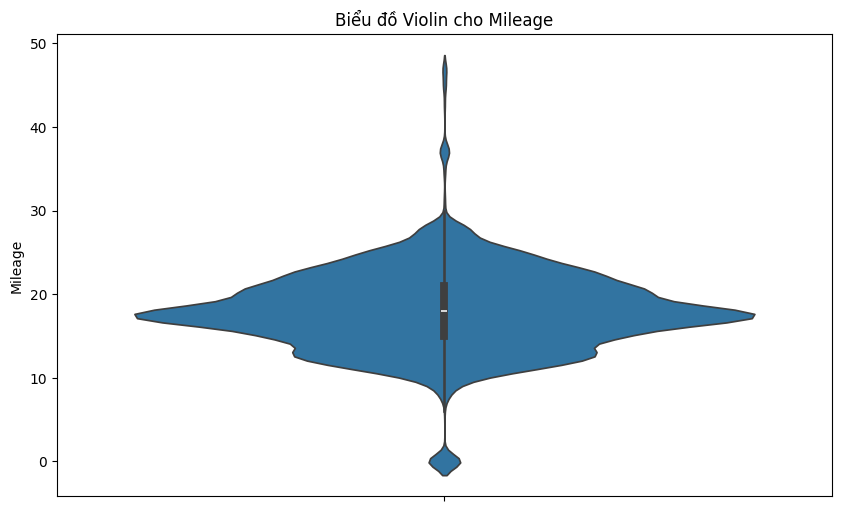

In [181]:
# Vẽ violin plot cho cột 'Mileage'
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước figure nếu cần
sns.violinplot(y='Mileage', data=df)
plt.title('Biểu đồ Violin cho Mileage')
plt.ylabel('Mileage')
plt.show()

Một số ý rút ra từ biểu đồ trên:
- Trong tập dữ liệu này, mức tiết kiệm nhiên liệu của các xe chủ yếu nằm trong khoảng từ 10 đến 30 kmpl.
- Có một số xe có mức tiết kiệm vượt trội lên đến 40 đến 50 kmpl, tuy nhiên đây có thể là giá trị nhiễu hoặc outlier nên cần xử lý kỹ.
- Có một số giá trị nhiễu khác là 0 kmpl.

## 2. Khám phá về dữ liệu nhiều biến

### 2.1 Khám phá mối quan hệ giữa các trường dữ liệu

Sử dụng biểu đồ heatmap để vẽ ma trận tương quan giữa các cột có kiểu dữ liệu numerical. Biểu đồ này giúp chúng ta có thể quan sát 2 chiều, xem những cột nào có mối quan hệ tuyến tính mạnh mẽ với nhau, những cột không có mối tương quan và ngược lại là tuyến tính âm.

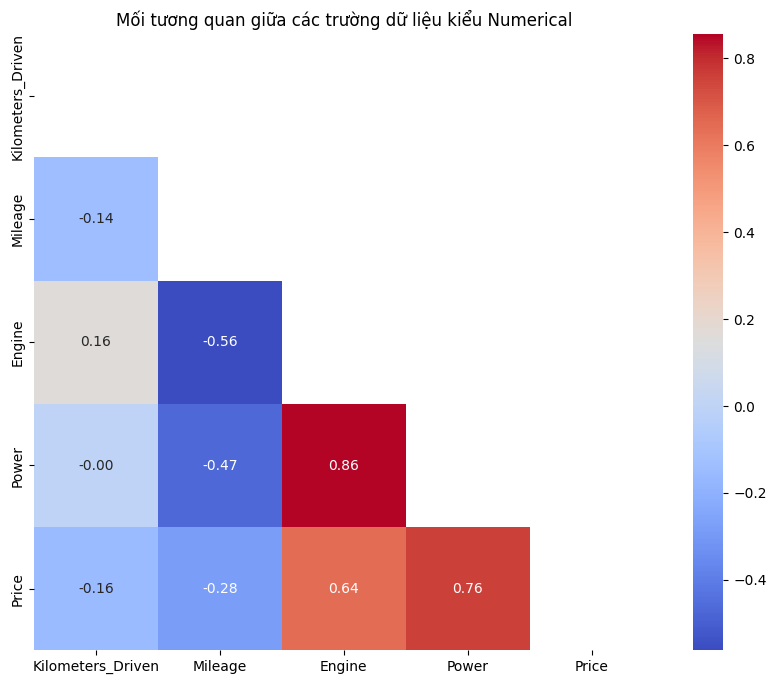

In [182]:
# Lọc các cột numeric
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
corr_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask,annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mối tương quan giữa các trường dữ liệu kiểu Numerical')
plt.show()

## Từ biểu đồ heatmap này có thể rút ra được một số quan hệ như:
- Mối quan hệ giữa trường Engine và Power có mối quan hệ tuyến tính mạnh mẽ.
- Mối quan hệ giữa trường Price và Power/Engine.
- Mối quan hệ giữa Mileage và Engine/Power có mối quan hệ tuyến tính âm.
- Và một số khác ít có mối tương quan với nhau.

### 2.2 Numerical và Numerical

Chúng ta sẽ sử dụng biểu đồ Scatter plot để trực quan mối quan hệ giữa 2 cột có quan hệ có mối tương quan mạnh mẽ nhất được rút ra từ biểu đồ Heatmap trên. Scatter plot là một trong các biểu đồ tốt nhất để thể hiện mối quan hệ giữa 2 trường dữ liệu, cũng như phát hiện outlier. Hơn nữa, chúng ta có thể thêm loại nhiên liệu để quan sát mối quan của cả 3 trường dữ liệu này.

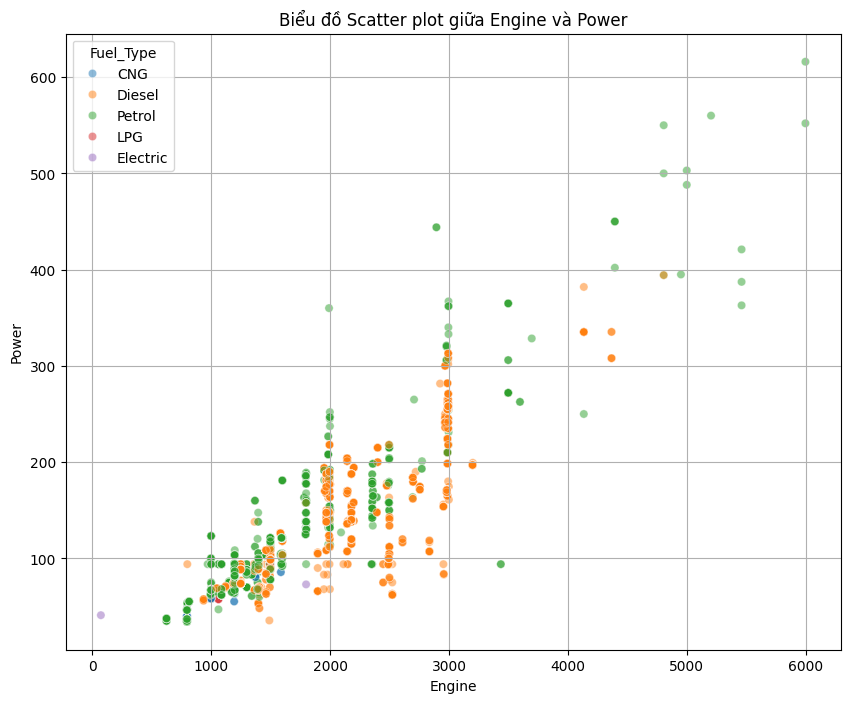

In [183]:


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Engine', y='Power', hue='Fuel_Type', color='blue', alpha=0.5)
plt.title('Biểu đồ Scatter plot giữa Engine và Power')
plt.xlabel('Engine')
plt.ylabel('Power')
plt.grid(True)
plt.show()

Qua quan sát ta có thể thấy:
- Engine và Power có mức độ tương quan rất cao, khi Engine tăng thì Power cũng tăng ở mức tương tự.
- Dòng xe chạy dầu (Diesel) có công suất và dung tích xi lanh ở mức vừa và thấp.
- Dòng xe chạy xăng (Petrol) phân bố rộng từ thấp đến cao của công suất và dung tích xi lanh.
- Ta có thể dễ dàng quan sát các outliers trong tập dữ liệu.

### 2.3 Numerical và Categorical

#### Cột "Price", "Seats" và "Transmission"

Vì về giá trị Price(giá cả) thì mọi người sẽ thường quan tâm đến phân phối của mức giá, mức giá trung bình, max, min nên boxplot là một loại biểu đồ phù hợp nhất. Vì vậy, ta sẽ quan sát với mỗi loại xe có số lượng chỗ khác nhau và 2 loại hộp số thì sẽ có những mức giá như thế nào?

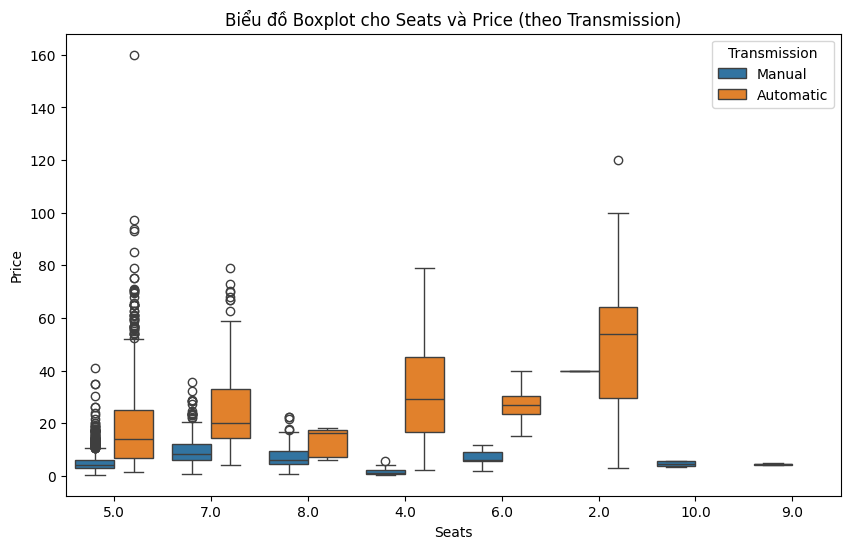

In [184]:
# Vẽ boxplot cho cột 'Seats' và 'Price', với 'Transmission' làm hue
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước figure nếu cần
sns.boxplot(x='Seats', y='Price', hue='Transmission', data=df)
plt.title('Biểu đồ Boxplot cho Seats và Price (theo Transmission)')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.legend(title='Transmission')
plt.show()

Ý nghĩa rút ra từ biểu đồ:
- Những loại xe có hộp số tự động thường có mức giá cao hơn và có nhiều giao động hơn.
- Những loại xe có số sàn thì có mức giá thấp và cố định hơn.
- Những dòng xe ít chỗ như 4 chỗ và 2 chỗ có mức giá cao hơn mặt bằng chung nên ta có thể suy ra đây thường là những dòng xe sang.

Từ biểu đồ này có thể giúp cho:
- Đối với người mua: có thể lựa chọn số chỗ ngồi tùy theo nhu cầu của bản thân hoặc gia đình và mức kinh tế của bản thân để lựa chọn xe cho mình.
- Đối với người bán: nhìn theo số chỗ ngồi, loại hộp số và mức giá trên biểu đồ đưa ra mức giá bán phù hợp.

### 2.4 Categorical và Categorical

#### Cột "Location" và "Fuel_Type"
Vì cả 2 cột đều là kiểu Categorical nên chúng ta cần phải có giá trị tần suất để có thể quan sát được mối quan hệ giữa 2 trường dữ liệu này. Ở đây chúng ta có thể dùng crosstab của pandas để tạo ra 1 bảng tần suất sau đó dùng heatmap để highlight các giá trị có tần suất cao lên. 

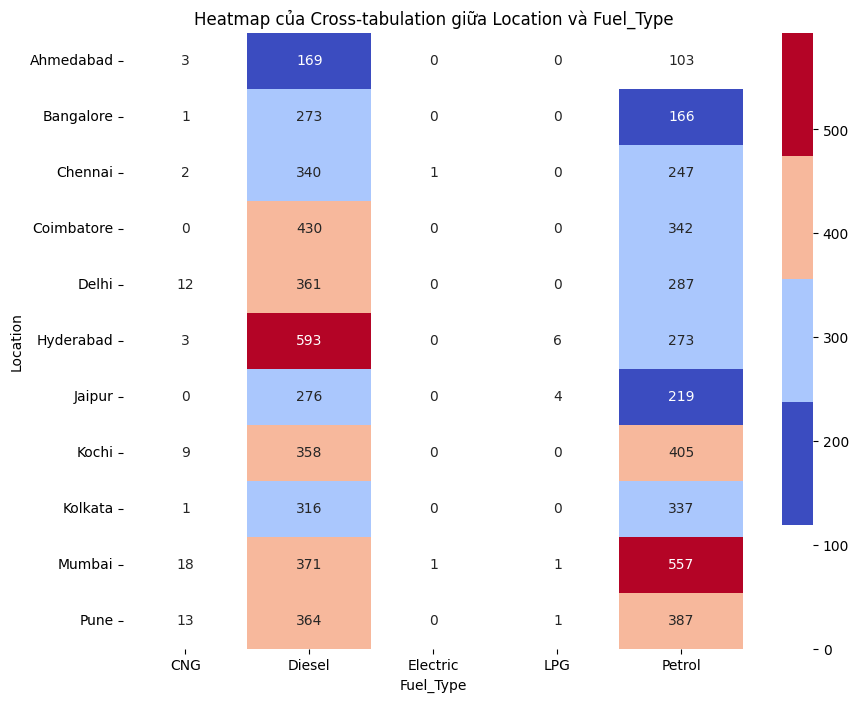

In [185]:


# Tạo bảng tần suất (crosstab) và lấy giá trị tần suất nhỏ nhất
crosstab = pd.crosstab(df['Location'], df['Fuel_Type'])
min_value = crosstab.min().min()

# Tính toán màu của từng ô dựa trên giá trị tần suất, sử dụng màu trắng cho giá trị nhỏ nhất
colors = ['white'] + sns.color_palette('coolwarm', as_cmap=True)(np.linspace(0, 1, len(crosstab.columns) - 1)).tolist()

# Vẽ heatmap với bảng tần suất đã tính toán và màu tùy chỉnh
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, cmap=sns.color_palette(colors), annot=True, fmt='d')
plt.title('Heatmap của Cross-tabulation giữa Location và Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Location')
plt.show()

Một số ý nghĩa có thể rút ra từ biểu đồ sau:
- Đối với người mua: nếu đang ở những thành phố có xe bán lại nhiều thì giá có thể rẻ, tuy nhiên có thể chất lượng sẽ không tốt. Người mua có thể phân tích rõ hơn để ra quyết định mua xe.
- Đối với người bán: Cần xem xét cụ thể việc bán nếu ở thành phố được bán lại nhiều thì mức giá phải chịu thiệt thòi nhiều hơn cũng như là sẽ có ít người mua hơn.
- Đối với nhà sản xuất: tìm hiểu xem xe của công ty mình tại sao lại bị bán nhiều ở thành phố này, do chất lượng kém, hay điều kiện địa hình ở nơi này,...

### 2.5 ARIMA models

ARIMA là viết tắt của AutoRegressive Integrated Moving Average (Tự hồi quy tích hợp trung bình trượt). Mô hình ARIMA là mô hình thống kê được sử dụng để phân tích và dự đoán dữ liệu chuỗi thời gian. Cách tiếp cận ARIMA phục vụ rõ ràng cho các cấu trúc tiêu chuẩn được tìm thấy trong chuỗi thời gian, cung cấp một phương pháp đơn giản nhưng mạnh mẽ để đưa ra các dự báo chuỗi thời gian.

**Ưu điểm của mô hình ARIMA**:

- Dễ sử dụng và dễ hiểu.
- Hiệu quả trong việc dự báo các chuỗi thời gian có tính chất tuyến tính và ổn định.
- Có thể mở rộng để mô hình hóa các chuỗi thời gian có tính chất phi tuyến tính và không ổn định.

**Nhược điểm của mô hình ARIMA**:

- Giả định rằng các giá trị trong chuỗi thời gian là độc lập với nhau, điều này có thể không đúng trong thực tế.
- Khó khăn trong việc xác định các giá trị phù hợp cho p, d, q.
- Hiệu quả dự báo có thể bị ảnh hưởng bởi các yếu tố bên ngoài không được mô hình hóa.

Order phù hợp cho mô hình ARIMA: (1, 1, 1)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


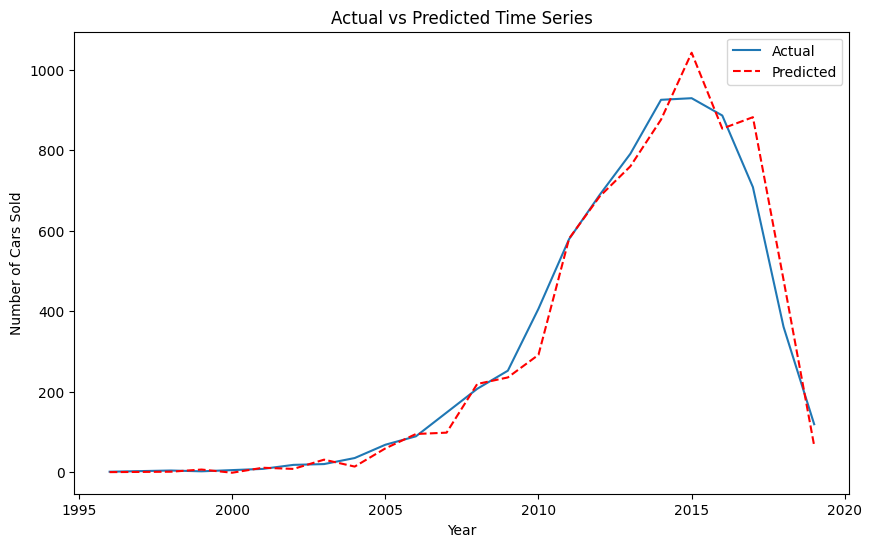

Dự đoán cho 5 năm tiếp theo:
23      6.093096
24    -63.791899
25   -107.048002
26   -133.821852
27   -150.393827
Name: predicted_mean, dtype: float64


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


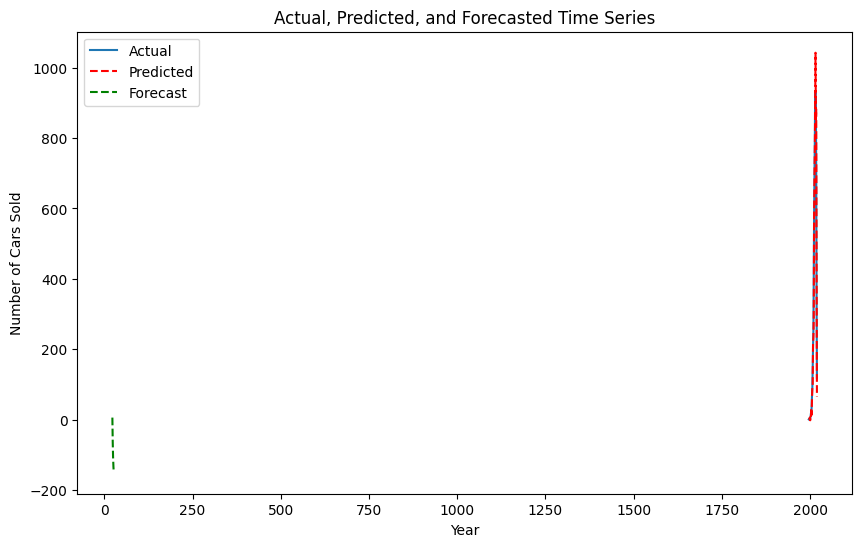

In [186]:
from pmdarima import auto_arima

# Xác định cột Year làm index và sắp xếp lại dữ liệu theo năm
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.sort_index(inplace=True)

# Tính tổng số lượng xe bán được theo năm
ts = df.groupby(df.index.year).size()

# Sử dụng auto_arima để chọn order phù hợp cho mô hình ARIMA
model = auto_arima(ts, seasonal=False, suppress_warnings=True)

# Hiển thị order tốt nhất được chọn
print("Order phù hợp cho mô hình ARIMA:", model.order)

# Tạo mô hình ARIMA với order được chọn
model = ARIMA(ts, order=model.order)

# Huấn luyện mô hình
model_fit = model.fit()

# Dự đoán với dữ liệu cũ
predictions = model_fit.predict(start=0, end=len(ts)-1, typ='levels')

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.plot(ts, label='Actual')
plt.plot(predictions, color='red', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.show()

# Dự đoán cho 5 năm tiếp theo
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# In ra dự đoán
print("Dự đoán cho 5 năm tiếp theo:")
print(forecast)

# # Vẽ biểu đồ dự đoán cho 5 năm tiếp theo
# plt.figure(figsize=(10,6))
# plt.plot(ts, label='Actual')
# plt.plot(predictions, color='red', linestyle='--', label='Predicted')
# plt.plot(range(len(ts), len(ts) + forecast_steps), forecast, color='green', linestyle='--', label='Forecast')
# plt.title('Actual, Predicted, and Forecasted Time Series')
# plt.xlabel('Year')
# plt.ylabel('Number of Cars Sold')
# plt.legend()
# plt.show()

Ý nghĩa có thể rút ra từ biểu đồ:: 

- Nhà sản xuất: mỗi công ty có thể xem xét vào khoảng thời gian nào xe của mình bị bán lại nhiều nhất tìm hiểu nguyên do vì sao, có sự kiện gì để để ra chiến lược tốt hơn cho tương lai.

- Người bán: Tự đánh giá điều kiện bất lợi của những khoảng thời gian đình trệ mua bán, so sánh với hiện tại giúp tránh bán ra những lúc nhu cầu mua không cao.

Sử dụng ARIMA để phân tích chuỗi thời gian của cột ‘Year’ và 'ts' - số xe bán quan các năm. Cụ thể, xem xét mối quan hệ giữa năm (Year) và tổng xe bán của các mẫu xe trong mỗi năm. Mô hình ARIMA có thể giúp dự đoán giá bán trong tương lai dựa trên dữ liệu trong quá khứ.



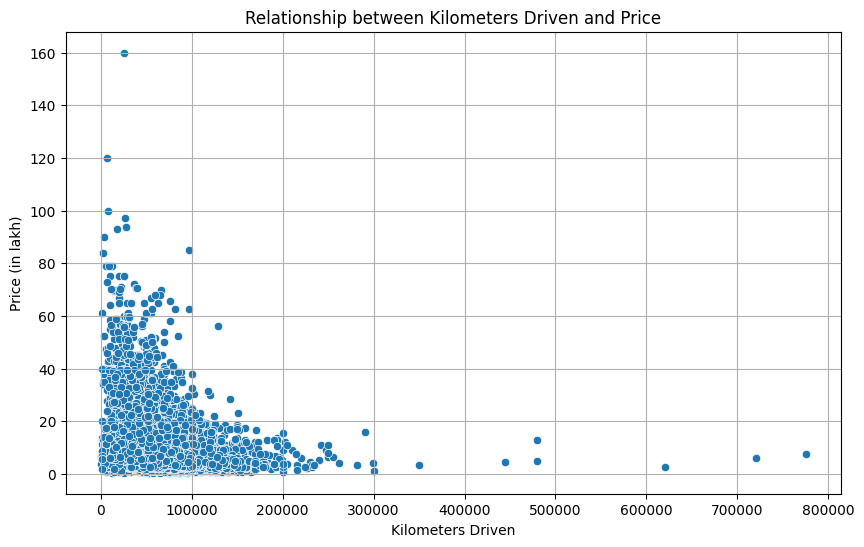

In [187]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title('Relationship between Kilometers Driven and Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in lakh)')
plt.grid(True)
plt.show()

Một số ý nghĩa có thể rút ra từ biểu đồ sau:
- Đối với người mua: 
  - Đánh giá giá trị của xe: Người mua có thể sử dụng biểu đồ để đánh giá mối quan hệ giữa số kilomet đã lái và giá của các chiếc xe. Họ có thể nhận biết xem liệu việc xe đã lái nhiều có ảnh hưởng đến giá cả hay không. Nếu có mối quan hệ đồng biến mạnh mẽ giữa hai biến, có thể ngụ ý rằng việc xe đã lái nhiều có thể dẫn đến giá xe giảm, và ngược lại.
  - Xác định nhu cầu: Các xe có số kilomet đã lái cao nhưng có giá thấp hơn so với dự đoán, có thể là một cơ hội mua sắm tốt cho người mua.
- Đối với người bán: Người bán có thể sử dụng biểu đồ để đánh giá xem giá cả của xe của họ có hợp lý so với số kilomet đã lái hay không. Nếu họ nhận thấy rằng xe của họ có số kilomet cao nhưng giá cả vẫn cao, họ có thể cân nhắc giảm giá để thu hút nhiều người mua hơn.
